In [7]:
import json

json = json.loads(open("angel_investors_filtered.json").read())

In [8]:
len(json)

32776

In [9]:
json[0]

{'name': 'Adam Draper',
 'position': 'managing_director',
 'min_investment': '500000',
 'firm': 'Boost VC',
 'image_url': 'https://signal-api.nfx.com/rails/active_storage/representations/redirect/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBBbVRkIiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--68f6628744736addce4bb9a0a81705700aa3423b/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaDdCem9MWm05eWJXRjBPZ2hxY0djNkUzSmxjMmw2WlY5MGIxOW1hV3hzV3dkcEFsZ0NhUUpZQWc9PSIsImV4cCI6bnVsbCwicHVyIjoidmFyaWF0aW9uIn19--f8e22238db523e6e5e5a8ae643921849c4b207bd/0',
 'locations': ['San Francisco Bay Area', 'Atherton'],
 'industries': ['Advertising',
  'Angel, Scout, and Solo-Capitalists',
  'BioTech',
  'Consumer Internet',
  'E-commerce',
  'Fashion',
  'Food and Beverage',
  'Games',
  'Gaming/eSports',
  'Marketplaces',
  'Retail',
  'San Francisco Bay Area']}

In [10]:
from pathlib import Path
import json

input_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered.json')
output_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json')


def has_valid_image_url(entry: dict) -> bool:
    """Return True if entry has a non-empty string image_url."""
    url = entry.get('image_url')
    if url is None:
        return False
    if not isinstance(url, str):
        return False
    return url.strip() != ''


data = json.loads(input_path.read_text())
total_entries = len(data)

filtered = [entry for entry in data if has_valid_image_url(entry)]
kept_entries = len(filtered)
removed_entries = total_entries - kept_entries

output_path.write_text(json.dumps(filtered, ensure_ascii=False, indent=2))

percent_removed = (removed_entries / total_entries * 100) if total_entries else 0.0
print(f'Removed {removed_entries} of {total_entries} entries without image_url ({percent_removed:.2f}%).')
print(f'Saved cleaned dataset to: {output_path}')

Removed 4119 of 32776 entries without image_url (12.57%).
Saved cleaned dataset to: /Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json


In [11]:
from pathlib import Path
import json

filtered_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json')


def is_blank_string(value) -> bool:
    """True if value is not a non-empty string."""
    return not isinstance(value, str) or value.strip() == ''


def is_empty_list(value) -> bool:
    """True if value is not a list or contains no non-blank strings."""
    if not isinstance(value, list):
        return True
    for item in value:
        if isinstance(item, str) and item.strip() != '':
            return False
    return True


data = json.loads(filtered_path.read_text())
before_count = len(data)

def is_valid_entry(entry: dict) -> bool:
    if is_blank_string(entry.get('firm')):
        return False
    if is_empty_list(entry.get('industries')):
        return False
    if is_empty_list(entry.get('locations')):
        return False
    return True

cleaned = [e for e in data if is_valid_entry(e)]
after_count = len(cleaned)
removed_count = before_count - after_count

filtered_path.write_text(json.dumps(cleaned, ensure_ascii=False, indent=2))

pct_removed = (removed_count / before_count * 100) if before_count else 0.0
print(f'Removed {removed_count} of {before_count} entries missing firm/industries/locations ({pct_removed:.2f}%).')
print(f'New total: {after_count}. Saved back to: {filtered_path}')


Removed 5684 of 28657 entries missing firm/industries/locations (19.83%).
New total: 22973. Saved back to: /Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json


In [12]:
from pathlib import Path
import json

# List all unique industries from the cleaned dataset
industries_source_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json')

entries = json.loads(industries_source_path.read_text())

unique_industries = set()
for entry in entries:
    entry_industries = entry.get('industries') or []
    if isinstance(entry_industries, list):
        for industry_name in entry_industries:
            if isinstance(industry_name, str):
                trimmed = industry_name.strip()
                if trimmed:
                    unique_industries.add(trimmed)

sorted_industries = sorted(unique_industries, key=lambda s: s.lower())

print(f'Total unique industries: {len(sorted_industries)}')
sorted_industries


Total unique industries: 103


['Advertising',
 'AgTech',
 'AI',
 'Analytics',
 'Angel, Scout, and Solo-Capitalists',
 'AR/VR',
 'AudioTech',
 'Austin',
 'AutoTech',
 'BioTech',
 'Boston / New England',
 'British Columbia',
 'Canada',
 'Chemicals',
 'ClimateTech/CleanTech',
 'Cloud Infrastructure',
 'Colorado / Utah',
 'ConstructionTech',
 'Consumer Health',
 'Consumer Internet',
 'Cosmetics',
 'Creator/Passion Economy',
 'Cybersecurity',
 'Data Services',
 'DeepTech',
 'DefenseTech',
 'Developer Tools',
 'Diagnostics',
 'Digital Health',
 'Direct-to-Consumer (DTC)',
 'Diverse Investors',
 'Drug Delivery',
 'E-commerce',
 'Education',
 'EnergyTech',
 'Enterprise',
 'Enterprise Applications',
 'Enterprise Infrastructure',
 'Entertainment & Sports',
 'Fashion',
 'Female Investors',
 'FinTech',
 'Food and Beverage',
 'Future of Work',
 'Games',
 'Gaming/eSports',
 'General Tech',
 'Generative Tech/AI',
 'Gig Economy',
 'GovTech',
 'Hardware',
 'Health & Hospital Services',
 'Health IT',
 'Human Capital/HRTech',
 'Impac

In [1]:
from pathlib import Path
import json

# Normalize and clean industries: collapse synonyms and remove noise (cities, attributes)
source_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json')

entries = json.loads(source_path.read_text())

location_noise = {
    'Austin',
    'Boston / New England',
    'British Columbia',
    'Canada',
    'Colorado / Utah',
    'Israel',
    'LatAm (Latin America)',
    'London',
    'Los Angeles / Southern California',
    'Midwest',
    'New York City',
    'Raleigh-Durham / Southeast US',
    'San Francisco Bay Area',
    'Seattle / Portland',
    'Washington, D.C.',
}

investor_attribute_noise = {
    'Female Investors',
    'Diverse Investors',
    'Investors who invested in diverse founders',
    'Investors who invested in female founders',
    'Investors who were founders',
}

synonyms_to_canonical = {
    'Web3/Blockchain': 'Web3',
    'Web3/Crypto': 'Web3',
    'Gaming/eSports': 'Gaming',
    'Games': 'Gaming',
    'ClimateTech/CleanTech': 'ClimateTech',
    'Generative Tech/AI': 'AI',
    'Security': 'Cybersecurity',
    'AutoTech': 'TransportationTech',
    'Real Estate/PropTech': 'PropTech',
    'Health IT': 'Healthcare',
    'Digital Health': 'Healthcare',
    'Consumer Health': 'Healthcare',
    'Health & Hospital Services': 'Healthcare',
    'Wellness & Fitness': 'Healthcare',
    'Enterprise': 'Enterprise Software',
    'Enterprise Applications': 'Enterprise Software',
}


def canonicalize_label(label: str) -> str:
    return synonyms_to_canonical.get(label, label)


def is_investor_attribute_noise(label: str) -> bool:
    return label in investor_attribute_noise


num_labels_before = 0
num_labels_after = 0
num_removed_noise = 0
num_collapsed = 0
num_moved_to_locations = 0

for entry in entries:
    raw_labels = entry.get('industries') or []
    if not isinstance(raw_labels, list):
        entry['industries'] = []
        continue

    num_labels_before += len(raw_labels)

    cleaned_labels = []
    seen = set()
    current_locations = entry.get('locations') or []
    if not isinstance(current_locations, list):
        current_locations = []
    
    for label in raw_labels:
        if not isinstance(label, str):
            continue
        name = label.strip()
        if not name:
            continue
        if is_investor_attribute_noise(name):
            num_removed_noise += 1
            continue
        if name in location_noise:
            if name not in current_locations:
                current_locations.append(name)
                num_moved_to_locations += 1
            continue
        canonical = canonicalize_label(name)
        if canonical != name:
            num_collapsed += 1
        if canonical not in seen:
            seen.add(canonical)
            cleaned_labels.append(canonical)

    entry['industries'] = cleaned_labels
    entry['locations'] = current_locations
    num_labels_after += len(cleaned_labels)

source_path.write_text(json.dumps(entries, ensure_ascii=False, indent=2))

print(f'Rewrote industries for {len(entries)} entries.')
print(f'Labels before: {num_labels_before}, after: {num_labels_after}.')
print(f'Removed noise labels: {num_removed_noise}. Collapsed labels: {num_collapsed}.')
print(f'Moved location labels to locations field: {num_moved_to_locations}.')
print('Example canonical set')
print(sorted({label for e in entries for label in e.get("industries", [])}))

Rewrote industries for 22973 entries.
Labels before: 134681, after: 96198.
Removed noise labels: 7003. Collapsed labels: 35136.
Moved location labels to locations field: 13431.
Example canonical set
['AI', 'AR/VR', 'Advertising', 'AgTech', 'Analytics', 'Angel, Scout, and Solo-Capitalists', 'AudioTech', 'BioTech', 'Chemicals', 'ClimateTech', 'Cloud Infrastructure', 'ConstructionTech', 'Consumer Internet', 'Cosmetics', 'Creator/Passion Economy', 'Cybersecurity', 'Data Services', 'DeepTech', 'DefenseTech', 'Developer Tools', 'Diagnostics', 'Direct-to-Consumer (DTC)', 'Drug Delivery', 'E-commerce', 'Education', 'EnergyTech', 'Enterprise Infrastructure', 'Enterprise Software', 'Entertainment & Sports', 'Fashion', 'FinTech', 'Food and Beverage', 'Future of Work', 'Gaming', 'General Tech', 'Gig Economy', 'GovTech', 'Hardware', 'Healthcare', 'Human Capital/HRTech', 'Impact', 'Insurance', 'IoT', 'LegalTech', 'Local Services', 'Lodging/Hospitality', 'Logistics', 'Manufacturing', 'MarketingTech',

In [3]:
from pathlib import Path
import json

# Collapse industries to 13 canonical categories and remove unwanted labels
json_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json')

data = json.loads(json_path.read_text())

# Canonical categories
CANONICAL = [
    'Data & AI',
    'DevTools & Infrastructure',
    'Enterprise Software',
    'Consumer Internet & Commerce',
    'FinTech',
    'Healthcare & Bio',
    'Climate & Sustainability',
    'Built World',
    'Industrial & Robotics',
    'Media & Entertainment',
    'Mobility & Travel',
    'Gov & Defense',
    'Web3',
]

# Mapping from current labels → canonical categories
LABEL_TO_CATEGORY = {
    # Data & AI
    'AI': 'Data & AI',
    'Analytics': 'Data & AI',
    'Data Services': 'Data & AI',

    # DevTools & Infrastructure
    'Developer Tools': 'DevTools & Infrastructure',
    'Cloud Infrastructure': 'DevTools & Infrastructure',
    'Enterprise Infrastructure': 'DevTools & Infrastructure',

    # Enterprise Software
    'Enterprise Software': 'Enterprise Software',
    'SaaS': 'Enterprise Software',
    'SMB Software': 'Enterprise Software',
    'Sales & CRM': 'Enterprise Software',
    'MarketingTech': 'Enterprise Software',
    'LegalTech': 'Enterprise Software',
    'Human Capital/HRTech': 'Enterprise Software',
    'Advertising': 'Enterprise Software',
    'Future of Work': 'Enterprise Software',

    # Consumer Internet & Commerce
    'Consumer Internet': 'Consumer Internet & Commerce',
    'E-commerce': 'Consumer Internet & Commerce',
    'Marketplaces': 'Consumer Internet & Commerce',
    'Direct-to-Consumer (DTC)': 'Consumer Internet & Commerce',
    'Social Networks': 'Consumer Internet & Commerce',
    'Social Commerce': 'Consumer Internet & Commerce',
    'Local Services': 'Consumer Internet & Commerce',
    'Messaging': 'Consumer Internet & Commerce',
    'Retail': 'Consumer Internet & Commerce',
    'Creator/Passion Economy': 'Consumer Internet & Commerce',
    'Cosmetics': 'Consumer Internet & Commerce',
    'Food and Beverage': 'Consumer Internet & Commerce',
    'Fashion': 'Consumer Internet & Commerce',
    'Parenting/Families': 'Consumer Internet & Commerce',

    # FinTech
    'FinTech': 'FinTech',
    'Payments': 'FinTech',
    'Insurance': 'FinTech',

    # Healthcare & Bio
    'Healthcare': 'Healthcare & Bio',
    'BioTech': 'Healthcare & Bio',
    'Pharmaceuticals': 'Healthcare & Bio',
    'Therapeutics': 'Healthcare & Bio',
    'Diagnostics': 'Healthcare & Bio',
    'Drug Delivery': 'Healthcare & Bio',
    'Medical Devices': 'Healthcare & Bio',

    # Climate & Sustainability
    'ClimateTech': 'Climate & Sustainability',
    'EnergyTech': 'Climate & Sustainability',
    'AgTech': 'Climate & Sustainability',

    # Built World
    'PropTech': 'Built World',
    'ConstructionTech': 'Built World',
    'Smart Cities/UrbanTech': 'Built World',

    # Industrial & Robotics
    'Manufacturing': 'Industrial & Robotics',
    'Logistics': 'Industrial & Robotics',
    'Supply Chain Tech': 'Industrial & Robotics',
    'Hardware': 'Industrial & Robotics',
    'IoT': 'Industrial & Robotics',
    'Robotics': 'Industrial & Robotics',
    'Semiconductors': 'Industrial & Robotics',
    'Material Science': 'Industrial & Robotics',
    'Chemicals': 'Industrial & Robotics',
    'DeepTech': 'Industrial & Robotics',
    'Space': 'Industrial & Robotics',

    # Media & Entertainment
    'Media/Content': 'Media & Entertainment',
    'Entertainment & Sports': 'Media & Entertainment',
    'AudioTech': 'Media & Entertainment',
    'Gaming': 'Media & Entertainment',
    'AR/VR': 'Media & Entertainment',

    # Mobility & Travel
    'TransportationTech': 'Mobility & Travel',
    'Travel': 'Mobility & Travel',
    'Lodging/Hospitality': 'Mobility & Travel',

    # Gov & Defense
    'GovTech': 'Gov & Defense',
    'DefenseTech': 'Gov & Defense',

    # Web3
    'Web3': 'Web3',
}

unmapped_labels = set()
num_entries = len(data)
old_label_count = 0
new_label_count = 0
removed_labels_count = 0

for entry in data:
    labels = entry.get('industries') or []
    if not isinstance(labels, list):
        entry['industries'] = []
        continue

    old_label_count += len(labels)

    collapsed = []
    for label in labels:
        if not isinstance(label, str):
            continue
        name = label.strip()
        if not name:
            continue
        canonical = LABEL_TO_CATEGORY.get(name)
        if canonical is None:
            unmapped_labels.add(name)
            # keep original if we don't know it, to avoid data loss
            canonical = name
        collapsed.append(canonical)

    # dedupe and keep consistent order
    seen = set()
    deduped = []
    for c in collapsed:
        if c not in seen:
            seen.add(c)
            deduped.append(c)

    entry['industries'] = deduped
    new_label_count += len(deduped)

json_path.write_text(json.dumps(data, ensure_ascii=False, indent=2))

print(f'Collapsed industries for {num_entries} entries.')
print(f'Labels before: {old_label_count}, after: {new_label_count}. Removed: {removed_labels_count}.')
if unmapped_labels:
    print('Unmapped labels (left as-is):', sorted(unmapped_labels))
print('Canonical categories:', CANONICAL)

Collapsed industries for 22973 entries.
Labels before: 96198, after: 72413. Removed: 0.
Unmapped labels (left as-is): ['Angel, Scout, and Solo-Capitalists', 'Cybersecurity', 'Education', 'General Tech', 'Gig Economy', 'Impact']
Canonical categories: ['Data & AI', 'DevTools & Infrastructure', 'Enterprise Software', 'Consumer Internet & Commerce', 'FinTech', 'Healthcare & Bio', 'Climate & Sustainability', 'Built World', 'Industrial & Robotics', 'Media & Entertainment', 'Mobility & Travel', 'Gov & Defense', 'Web3']


In [4]:
# list all unique industries
industries = set()
for entry in data:
    industries.update(entry.get('industries', []))
print(sorted(industries))

['Angel, Scout, and Solo-Capitalists', 'Built World', 'Climate & Sustainability', 'Consumer Internet & Commerce', 'Cybersecurity', 'Data & AI', 'DevTools & Infrastructure', 'Education', 'Enterprise Software', 'FinTech', 'General Tech', 'Gig Economy', 'Gov & Defense', 'Healthcare & Bio', 'Impact', 'Industrial & Robotics', 'Media & Entertainment', 'Mobility & Travel', 'Web3']


In [5]:
from pathlib import Path
import json

# List all unique locations from the cleaned dataset
locations_source_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json')

entries = json.loads(locations_source_path.read_text())

unique_locations = set()
for entry in entries:
    raw_locations = entry.get('locations') or []
    if isinstance(raw_locations, list):
        for location_name in raw_locations:
            if isinstance(location_name, str):
                trimmed = location_name.strip()
                if trimmed:
                    unique_locations.add(trimmed)

sorted_locations = sorted(unique_locations, key=lambda s: s.lower())

print(f'Total unique locations: {len(sorted_locations)}')
sorted_locations


Total unique locations: 607


['Abilene, Texas',
 'Abu Dhabi, United Arab Emirates',
 'Acre, Israel',
 'Africa',
 'Akron, Ohio',
 'Alabama',
 'Alameda, California',
 'Alaska',
 'Albany, Georgia',
 'Albany, New York',
 'Albuquerque, New Mexico',
 'Alexandria, Louisiana',
 'Alexandria, Virginia',
 'Aliso Viejo, California',
 'Allentown, Pennsylvania',
 'Alpharetta, Georgia',
 'Altamonte Springs, Florida',
 'Ames, Iowa',
 'Amsterdam, Netherlands',
 'Anchorage, Alaska',
 'Ankeny, Iowa',
 'Ann Arbor, Michigan',
 'Annapolis, Maryland',
 'Antwerp, Belgium',
 'Apex, North Carolina',
 'Apopka, Florida',
 'Appleton, Wisconsin',
 'Argentina',
 'Arizona',
 'Arkansas',
 'Armenia',
 'Asheville, North Carolina',
 'Asia',
 'Athens, Greece',
 'Athens-Clarke County, Georgia',
 'Atherton',
 'Atlanta, Georgia',
 'Auburn, Alabama',
 'Auckland, New Zealand',
 'Austin',
 'Austin, Texas',
 'Australia',
 'Austria',
 'B2B',
 'Bakersfield, California',
 'Baltimore, Maryland',
 'Bangalore',
 'Bangkok, Thailand',
 'Bangladesh',
 'Barcelona, Sp

In [8]:
from pathlib import Path
import json
import re

# Build a list of US-only locations from the cleaned dataset and save to JSON
source_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json')
out_path = Path('/Users/darshil/projects/freemoney/darshil_local/american_locations.json')

US_STATES = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}
ABBR_TO_NAME = {abbr: name for name, abbr in US_STATES.items()}
STATE_NAMES = set(US_STATES.keys())
STATE_ABBRS = set(ABBR_TO_NAME.keys())

US_REGION_LABELS = {
    'San Francisco Bay Area',
    'Los Angeles / Southern California',
    'Seattle / Portland',
    'Boston / New England',
    'Raleigh-Durham / Southeast US',
    'Midwest',
    'East Bay',
    'SF',
    'United States',
    'Washington, D.C.',
    'Washington, District of Columbia',
    'District of Columbia',
}

entries = json.loads(source_path.read_text())

# Collect unique location labels from entries
unique_locations = set()
for entry in entries:
    raw_locations = entry.get('locations') or []
    if isinstance(raw_locations, list):
        for location_name in raw_locations:
            if isinstance(location_name, str):
                trimmed = location_name.strip()
                if trimmed:
                    unique_locations.add(trimmed)

# Helper: does label reference a US state by full name or abbreviation?
state_suffix_pattern = re.compile(r',\s+([A-Z]{2})$')

def extract_state_from_label(label: str) -> str | None:
    for state in STATE_NAMES:
        if label.endswith(', ' + state) or label == state:
            return state
    m = state_suffix_pattern.search(label)
    if m:
        abbr = m.group(1)
        if abbr in ABBR_TO_NAME:
            return ABBR_TO_NAME[abbr]
    # Special DC formats
    if label in {'Washington, D.C.', 'Washington, District of Columbia', 'District of Columbia'}:
        return 'District of Columbia'
    # Label is just 'Washington' → treat as the state
    if label == 'Washington':
        return 'Washington'
    return None

# If we see both "City" and "City, <US state>" in the set, treat the bare city as US
def has_us_anchored_variant(bare: str) -> bool:
    prefix = bare + ', '
    for loc in unique_locations:
        if loc.startswith(prefix) and extract_state_from_label(loc) is not None:
            return True
    return False

american_locations = set()
for loc in unique_locations:
    if loc in US_REGION_LABELS:
        american_locations.add(loc)
        continue
    state = extract_state_from_label(loc)
    if state is not None:
        american_locations.add(loc)
        continue
    # Bare US city heuristic
    if has_us_anchored_variant(loc):
        american_locations.add(loc)

sorted_us_locations = sorted(american_locations, key=lambda s: s.lower())

out_path.write_text(json.dumps(sorted_us_locations, ensure_ascii=False, indent=2))
print(f'Wrote {len(sorted_us_locations)} US locations to: {out_path}')


Wrote 394 US locations to: /Users/darshil/projects/freemoney/darshil_local/american_locations.json


In [9]:
from pathlib import Path
import json
import re

# Filter full entries to only those with US locations, save to JSON
entries_path = Path('/Users/darshil/projects/freemoney/darshil_local/angel_investors_filtered_with_images.json')
us_locations_path = Path('/Users/darshil/projects/freemoney/darshil_local/american_locations.json')
out_path = Path('/Users/darshil/projects/freemoney/darshil_local/american_entries.json')

entries = json.loads(entries_path.read_text())

# Load US location labels if available; otherwise detect minimally by state suffix/known regions
if us_locations_path.exists():
    us_location_labels = set(json.loads(us_locations_path.read_text()))
else:
    US_STATES = {
        'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
        'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
        'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
        'VA','WA','WV','WI','WY','DC'
    }
    US_REGION_LABELS = {
        'San Francisco Bay Area',
        'Los Angeles / Southern California',
        'Seattle / Portland',
        'Boston / New England',
        'Raleigh-Durham / Southeast US',
        'Midwest',
        'East Bay',
        'SF',
        'United States',
        'Washington, D.C.',
        'Washington, District of Columbia',
        'District of Columbia',
        'California','Florida','Texas','New York','Illinois','Pennsylvania','Ohio','Georgia',
        'North Carolina','Michigan','New Jersey','Virginia','Washington'
    }
    state_suffix_pattern = re.compile(r',\s+([A-Z]{2})$')

    # Build a quick set of candidate US labels from all entry locations
    all_labels = set()
    for e in entries:
        locs = e.get('locations') or []
        if isinstance(locs, list):
            for l in locs:
                if isinstance(l, str) and l.strip():
                    all_labels.add(l.strip())

    us_location_labels = set()
    for label in all_labels:
        if label in US_REGION_LABELS:
            us_location_labels.add(label)
            continue
        m = state_suffix_pattern.search(label)
        if m and m.group(1) in US_STATES:
            us_location_labels.add(label)

# Keep entries with any location that matches a US label
american_entries = []
for entry in entries:
    locs = entry.get('locations') or []
    if not isinstance(locs, list):
        continue
    for loc in locs:
        if isinstance(loc, str) and loc.strip() in us_location_labels:
            american_entries.append(entry)
            break

out_path.write_text(json.dumps(american_entries, ensure_ascii=False, indent=2))
print(f'Wrote {len(american_entries)} entries (of {len(entries)}) to: {out_path}')


Wrote 14118 entries (of 22973) to: /Users/darshil/projects/freemoney/darshil_local/american_entries.json


Known min_investments: 14118, Unknown/invalid: 0


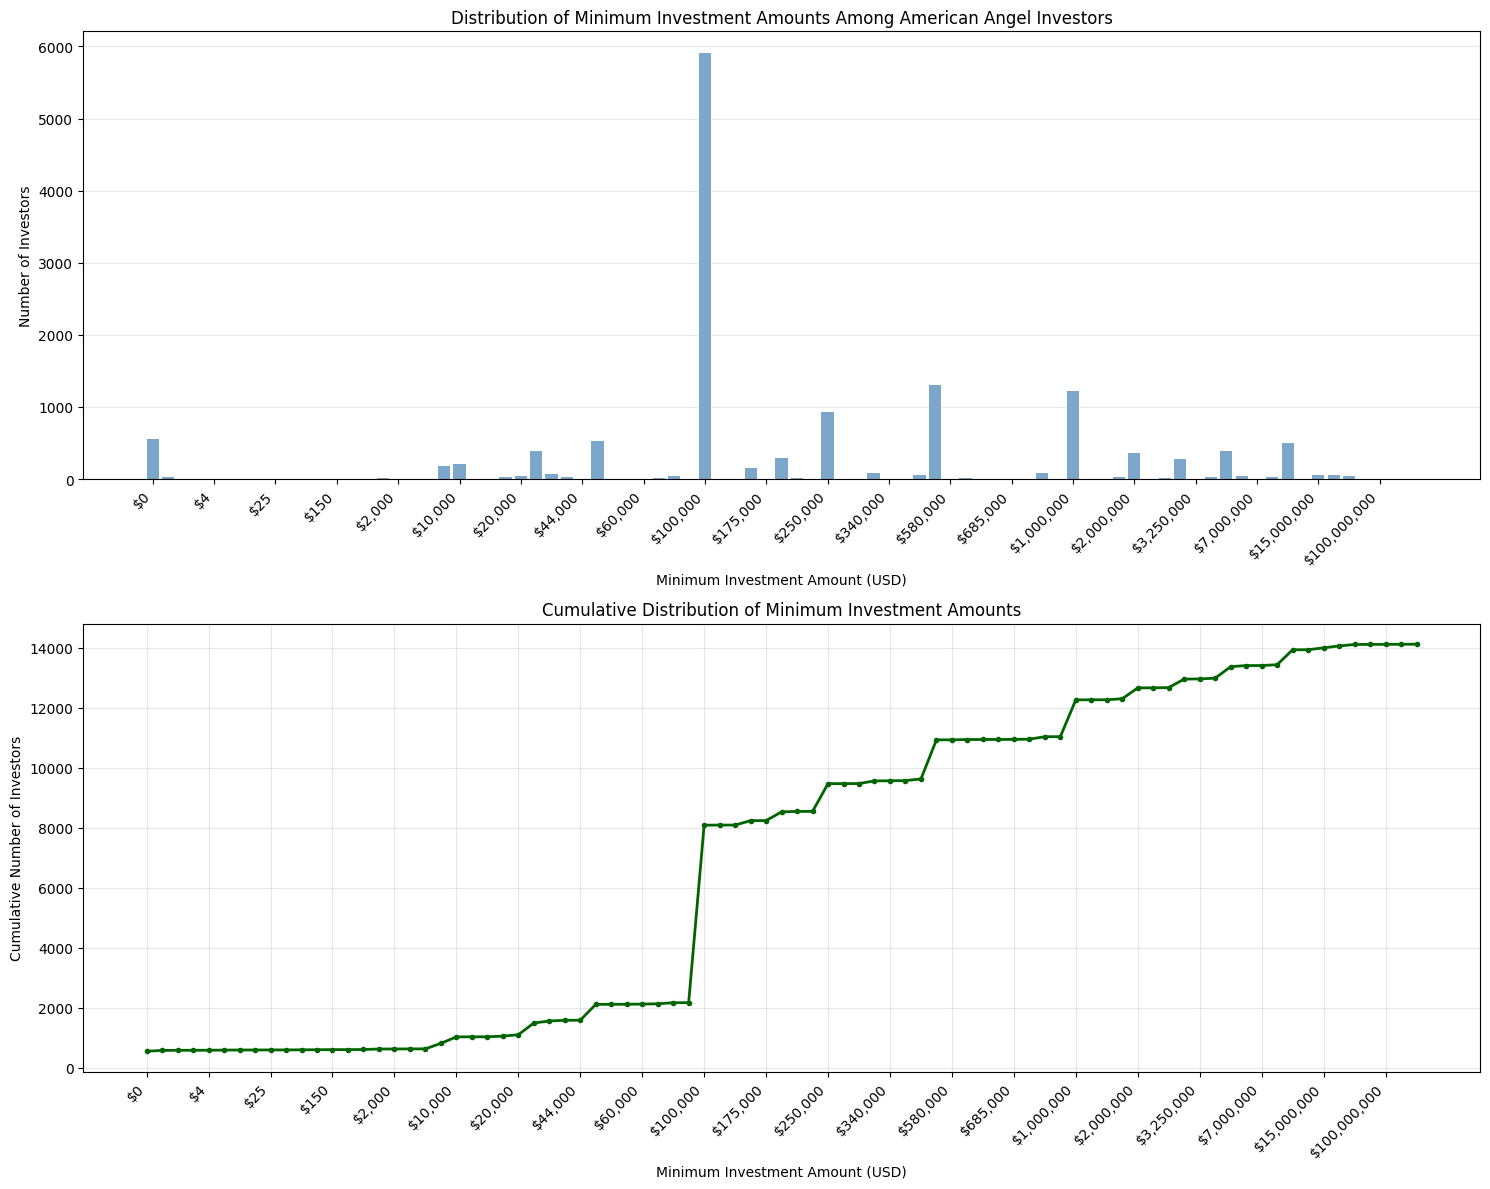


Top 10 most common minimum investment amounts:
$100,000: 5914 investors
$500,000: 1303 investors
$1,000,000: 1227 investors
$250,000: 925 investors
$0: 554 investors
$50,000: 528 investors
$10,000,000: 498 investors
$25,000: 390 investors
$5,000,000: 383 investors
$2,000,000: 362 investors


In [12]:
from pathlib import Path
import json
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Frequency of min_investment among American entries
entries_path = Path('/Users/darshil/projects/freemoney/darshil_local/american_entries.json')

entries = json.loads(entries_path.read_text())

number_chars_pattern = re.compile(r'[^0-9]')

def parse_min_investment(value):
    """Return integer USD amount if parseable, otherwise None."""
    if value is None:
        return None
    if isinstance(value, (int, float)):
        try:
            return int(value)
        except Exception:
            return None
    if isinstance(value, str):
        cleaned = number_chars_pattern.sub('', value.strip())
        if cleaned == '':
            return None
        try:
            return int(cleaned)
        except Exception:
            return None
    return None

freq = Counter()
unknown_count = 0

for entry in entries:
    amount = parse_min_investment(entry.get('min_investment'))
    if amount is None:
        unknown_count += 1
    else:
        freq[amount] += 1

sorted_freq = sorted(freq.items(), key=lambda kv: kv[0])

print(f'Known min_investments: {sum(freq.values())}, Unknown/invalid: {unknown_count}')

# Create charts
amounts = [item[0] for item in sorted_freq]
counts = [item[1] for item in sorted_freq]

# Calculate cumulative counts
cumulative_counts = np.cumsum(counts)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Distribution chart
ax1.bar(range(len(amounts)), counts, alpha=0.7, color='steelblue')
ax1.set_xlabel('Minimum Investment Amount (USD)')
ax1.set_ylabel('Number of Investors')
ax1.set_title('Distribution of Minimum Investment Amounts Among American Angel Investors')

# Format x-axis labels for readability
tick_positions = range(0, len(amounts), max(1, len(amounts) // 20))
tick_labels = [f'${amounts[i]:,}' for i in tick_positions]
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Cumulative chart
ax2.plot(range(len(amounts)), cumulative_counts, marker='o', markersize=3, color='darkgreen', linewidth=2)
ax2.set_xlabel('Minimum Investment Amount (USD)')
ax2.set_ylabel('Cumulative Number of Investors')
ax2.set_title('Cumulative Distribution of Minimum Investment Amounts')
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_labels, rotation=45, ha='right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Show top 10 most common amounts
print("\nTop 10 most common minimum investment amounts:")
top_amounts = sorted(freq.items(), key=lambda kv: kv[1], reverse=True)[:10]
for amount, count in top_amounts:
    print(f'${amount:,}: {count} investors')


In [13]:
from pathlib import Path
import json
import re

# Create a JSON with American entries whose min_investment is <= 100k
src_path = Path('/Users/darshil/projects/freemoney/darshil_local/american_entries.json')
out_path = Path('/Users/darshil/projects/freemoney/darshil_local/american_entries_max_100k.json')

entries = json.loads(src_path.read_text())

number_chars_pattern = re.compile(r'[^0-9]')

def parse_amount(value):
    if value is None:
        return None
    if isinstance(value, (int, float)):
        try:
            return int(value)
        except Exception:
            return None
    if isinstance(value, str):
        cleaned = number_chars_pattern.sub('', value.strip())
        if cleaned == '':
            return None
        try:
            return int(cleaned)
        except Exception:
            return None
    return None

threshold = 100_000
filtered = []
for entry in entries:
    amount = parse_amount(entry.get('min_investment'))
    if amount is not None and amount <= threshold:
        filtered.append(entry)

out_path.write_text(json.dumps(filtered, ensure_ascii=False, indent=2))
print(f'Saved {len(filtered)} entries with min_investment ≤ {threshold:,} to: {out_path}')


Saved 8087 entries with min_investment ≤ 100,000 to: /Users/darshil/projects/freemoney/darshil_local/american_entries_max_100k.json
